# Regional plot

## load gwaslab

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

In [2]:
gl.show_version()

2025/03/06 16:03:18 GWASLab v3.5.6 https://cloufield.github.io/gwaslab/
2025/03/06 16:03:18 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com


## download sample data

In [3]:
#!wget -O t2d_bbj.txt.gz http://jenger.riken.jp/14/

## load sumstats into gwaslab.Sumstats

In [4]:
mysumstats = gl.Sumstats("../0_sample_data/t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             build="19",
             chrom_pat="7",
             n="N")
mysumstats.basic_check(verbose = False)

2025/03/06 16:03:23 GWASLab v3.5.6 https://cloufield.github.io/gwaslab/
2025/03/06 16:03:23 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/03/06 16:03:23 Start to initialize gl.Sumstats from file :../0_sample_data/t2d_bbj.txt.gz
2025/03/06 16:03:23  -Columns used to filter variants: CHR
2025/03/06 16:03:23  -Loading only variants on chromosome with pattern : 7 ...
2025/03/06 16:03:44  -Loaded 707780 variants on chromosome with pattern :7 ...
2025/03/06 16:03:44  -Reading columns          : Frq,ALT,BETA,POS,Dir,REF,CHR,N,SE,SNP,P
2025/03/06 16:03:44  -Renaming columns to      : EAF,EA,BETA,POS,DIRECTION,NEA,CHR,N,SE,SNPID,P
2025/03/06 16:03:44  -Current Dataframe shape : 707780  x  11
2025/03/06 16:03:44  -Initiating a status column: STATUS ...
2025/03/06 16:03:44  -Genomic coordinates are based on GRCh37/hg19...
2025/03/06 16:03:45  -NEAF is specified...
2025/03/06 16:03:45  -Checking if 0<= NEAF <=1 ...
2025/03/06 16:03:45  -Converted NEAF to EAF.
2025/

## Create Manhattan plot with sumstats on a single chromosome

2025/03/06 16:03:59 Start to create MQQ plot...v3.5.6:
2025/03/06 16:03:59  -Genomic coordinates version: 19...
2025/03/06 16:03:59  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:03:59  -Raw input contains 707780 variants...
2025/03/06 16:03:59  -MQQ plot layout mode is : m
2025/03/06 16:03:59 Finished loading specified columns from the sumstats.
2025/03/06 16:03:59 Start data conversion and sanity check:
2025/03/06 16:03:59  -Removed 0 variants with nan in CHR or POS column ...
2025/03/06 16:03:59  -Removed 0 variants with CHR <=0...
2025/03/06 16:03:59  -Removed 0 variants with nan in P column ...
2025/03/06 16:03:59  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/03/06 16:03:59  -Sumstats P values are being converted to -log10(P)...
2025/03/06 16:03:59  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/03/06 16:04:00  -Converting data above cut line...
2025/03/06 16:04:00  -Maximum -log10(P) va

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7fab83047350>)

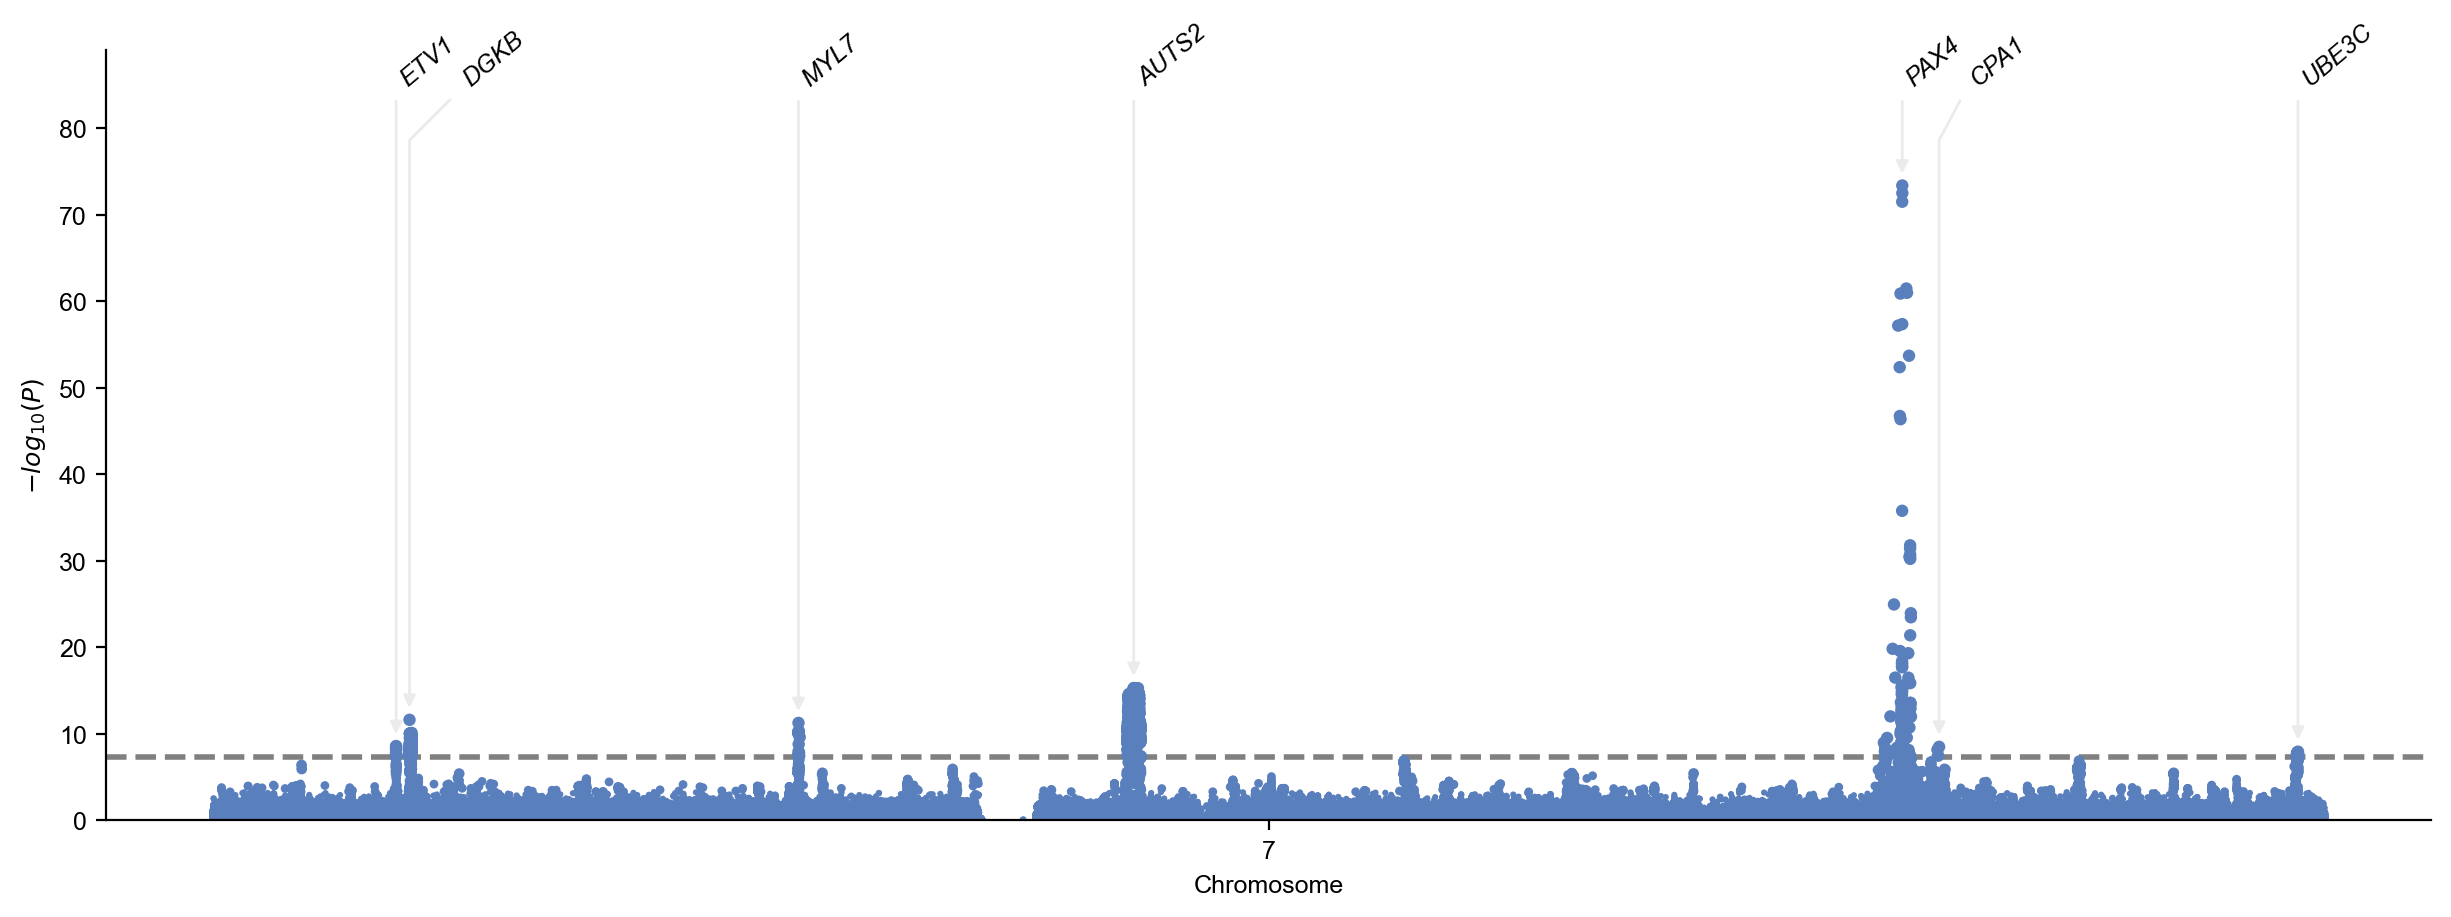

In [5]:
mysumstats.plot_mqq(mode="m",anno="GENENAME",anno_source="ensembl")

## Check lead variants

In [6]:
mysumstats.get_lead()

2025/03/06 16:04:07 Start to extract lead variants...v3.5.6
2025/03/06 16:04:07  -Current Dataframe shape : 707780 x 12 ; Memory usage: 75.40 MB
2025/03/06 16:04:07  -Processing 707780 variants...
2025/03/06 16:04:07  -Significance threshold : 5e-08
2025/03/06 16:04:07  -Sliding window size: 500  kb
2025/03/06 16:04:07  -Using P for extracting lead variants...
2025/03/06 16:04:07  -Found 1077 significant variants in total...
2025/03/06 16:04:07  -Identified 7 lead variants!
2025/03/06 16:04:07 Finished extracting lead variants.


SNPID  CHR        POS EA NEA     EAF    BETA      SE  \
77576    7:13888699_G_C    7   13888699  G   C  0.5680  0.0562  0.0094   
83154    7:14898282_C_T    7   14898282  C   T  0.6012  0.0617  0.0088   
229433   7:44174857_T_G    7   44174857  G   T  0.5985 -0.0640  0.0093   
335366   7:69406661_A_T    7   69406661  T   A  0.1981 -0.0900  0.0111   
568451  7:127253550_C_T    7  127253550  C   T  0.9081  0.2761  0.0152   
579917  7:130025713_G_A    7  130025713  G   A  0.9530 -0.1365  0.0230   
695434  7:157038803_A_G    7  157038803  G   A  0.4626 -0.0502  0.0088   

                   P       N DIRECTION   STATUS  
77576   2.507000e-09  191764      ++++  1960099  
83154   2.336000e-12  191764      ++++  1960099  
229433  5.325000e-12  191764      ----  1960099  
335366  4.871000e-16  191764      ----  1960099  
568451  4.101000e-74  191764      ++++  1960099  
579917  3.068000e-09  191764      ----  1960099  
695434  1.127000e-08  191764      ----  1960099

## Create a regional plot with no additional information

2025/03/06 16:04:07 Start to create MQQ plot...v3.5.6:
2025/03/06 16:04:07  -Genomic coordinates version: 19...
2025/03/06 16:04:07  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:04:07  -Raw input contains 707780 variants...
2025/03/06 16:04:07  -MQQ plot layout mode is : mqq
2025/03/06 16:04:07  -Region to plot : chr7:156538803-157538803.
2025/03/06 16:04:07  -Extract SNPs in region : chr7:156538803-157538803...
2025/03/06 16:04:07  -Extract SNPs in specified regions: 5831
2025/03/06 16:04:07 Finished loading specified columns from the sumstats.
2025/03/06 16:04:07 Start data conversion and sanity check:
2025/03/06 16:04:07  -Removed 0 variants with nan in CHR or POS column ...
2025/03/06 16:04:07  -Removed 0 variants with CHR <=0...
2025/03/06 16:04:07  -Removed 0 variants with nan in P column ...
2025/03/06 16:04:07  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/03/06 16:04:07  -Sumstats P values are bein

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7fab83047350>)

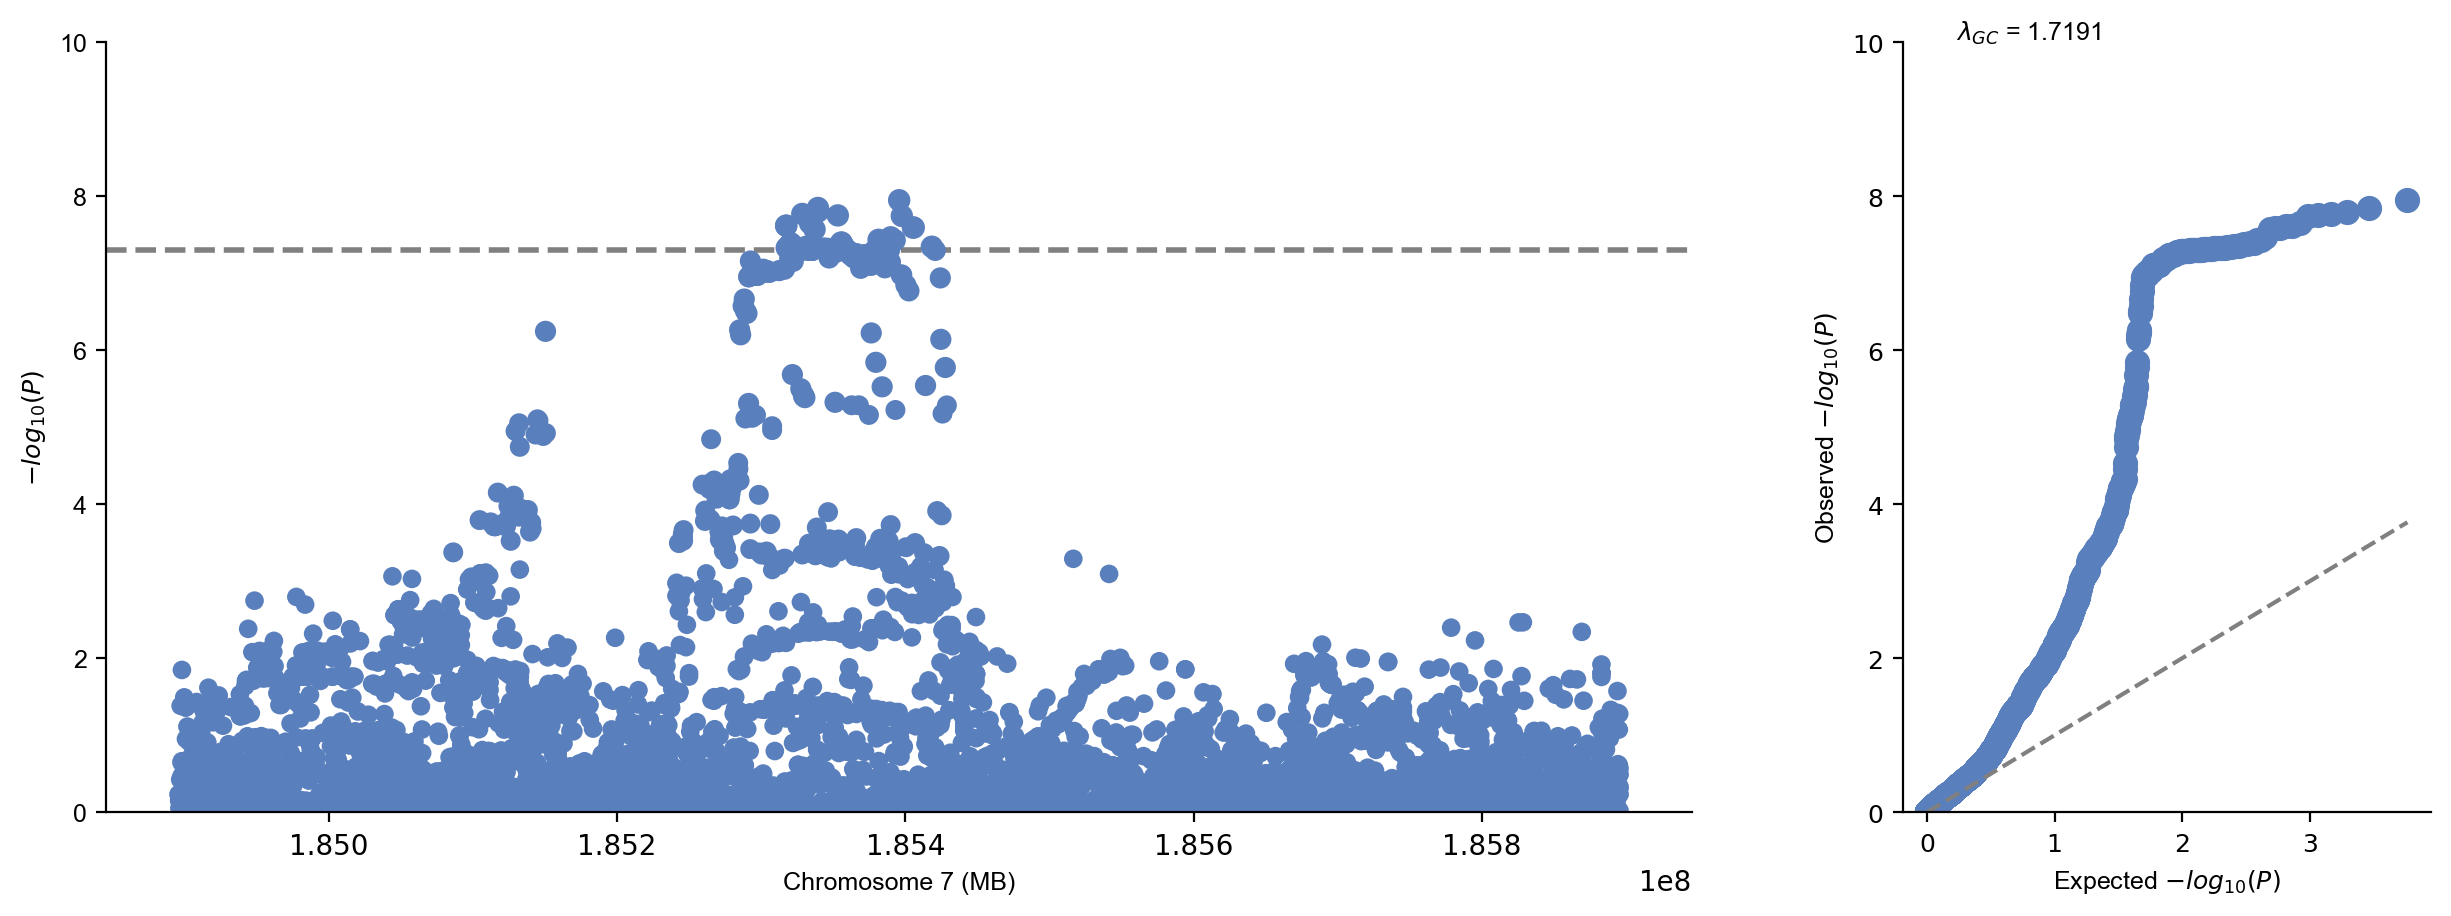

In [7]:
mysumstats.plot_mqq(region=(7,156538803,157538803))

## Create a regional plot with gene track

2025/03/06 16:04:08 Start to create MQQ plot...v3.5.6:
2025/03/06 16:04:08  -Genomic coordinates version: 19...
2025/03/06 16:04:08  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:04:08  -Raw input contains 707780 variants...
2025/03/06 16:04:08  -MQQ plot layout mode is : r
2025/03/06 16:04:08  -Region to plot : chr7:156538803-157538803.
2025/03/06 16:04:08  -Extract SNPs in region : chr7:156538803-157538803...
2025/03/06 16:04:08  -Extract SNPs in specified regions: 5831
2025/03/06 16:04:08 Finished loading specified columns from the sumstats.
2025/03/06 16:04:08 Start data conversion and sanity check:
2025/03/06 16:04:08  -Removed 0 variants with nan in CHR or POS column ...
2025/03/06 16:04:08  -Removed 0 variants with CHR <=0...
2025/03/06 16:04:08  -Removed 0 variants with nan in P column ...
2025/03/06 16:04:08  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/03/06 16:04:08  -Sumstats P values are being 

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/03/06 16:04:38  -plotting gene track..
2025/03/06 16:04:38  -plotting genes: 9..
2025/03/06 16:04:38  -plotting exons: 391..
2025/03/06 16:04:38  -Finished plotting gene track..
2025/03/06 16:04:38 Finished creating MQQ plot successfully!
2025/03/06 16:04:38 Start to extract variants for annotation...
2025/03/06 16:04:39  -Found 1 significant variants with a sliding window size of 500 kb...
2025/03/06 16:04:39 Finished extracting variants for annotation...
2025/03/06 16:04:39 Start to process figure arts.
2025/03/06 16:04:39  -Processing X labels...
2025/03/06 16:04:39  -Processing Y labels...
2025/03/06 16:04:39  -Processing Y tick lables...
2025/03/06 16:04:39  -Processing Y labels...
2025/03/06 16:04:39  -Processing lines...
2025/03/06 16:04:39 Finished processing figure arts.
2025/03/06 16:04:39 Start to annotate variants...
2025/03/06 16:04:39  -Skip annotating
2025/03/06 16:04:39 Finished annotating variants.
2025/03/06 16:04:39 Start to save figure...
2025/03/06 16:04:39  -

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.g_Log.Log at 0x7fab83047350>)

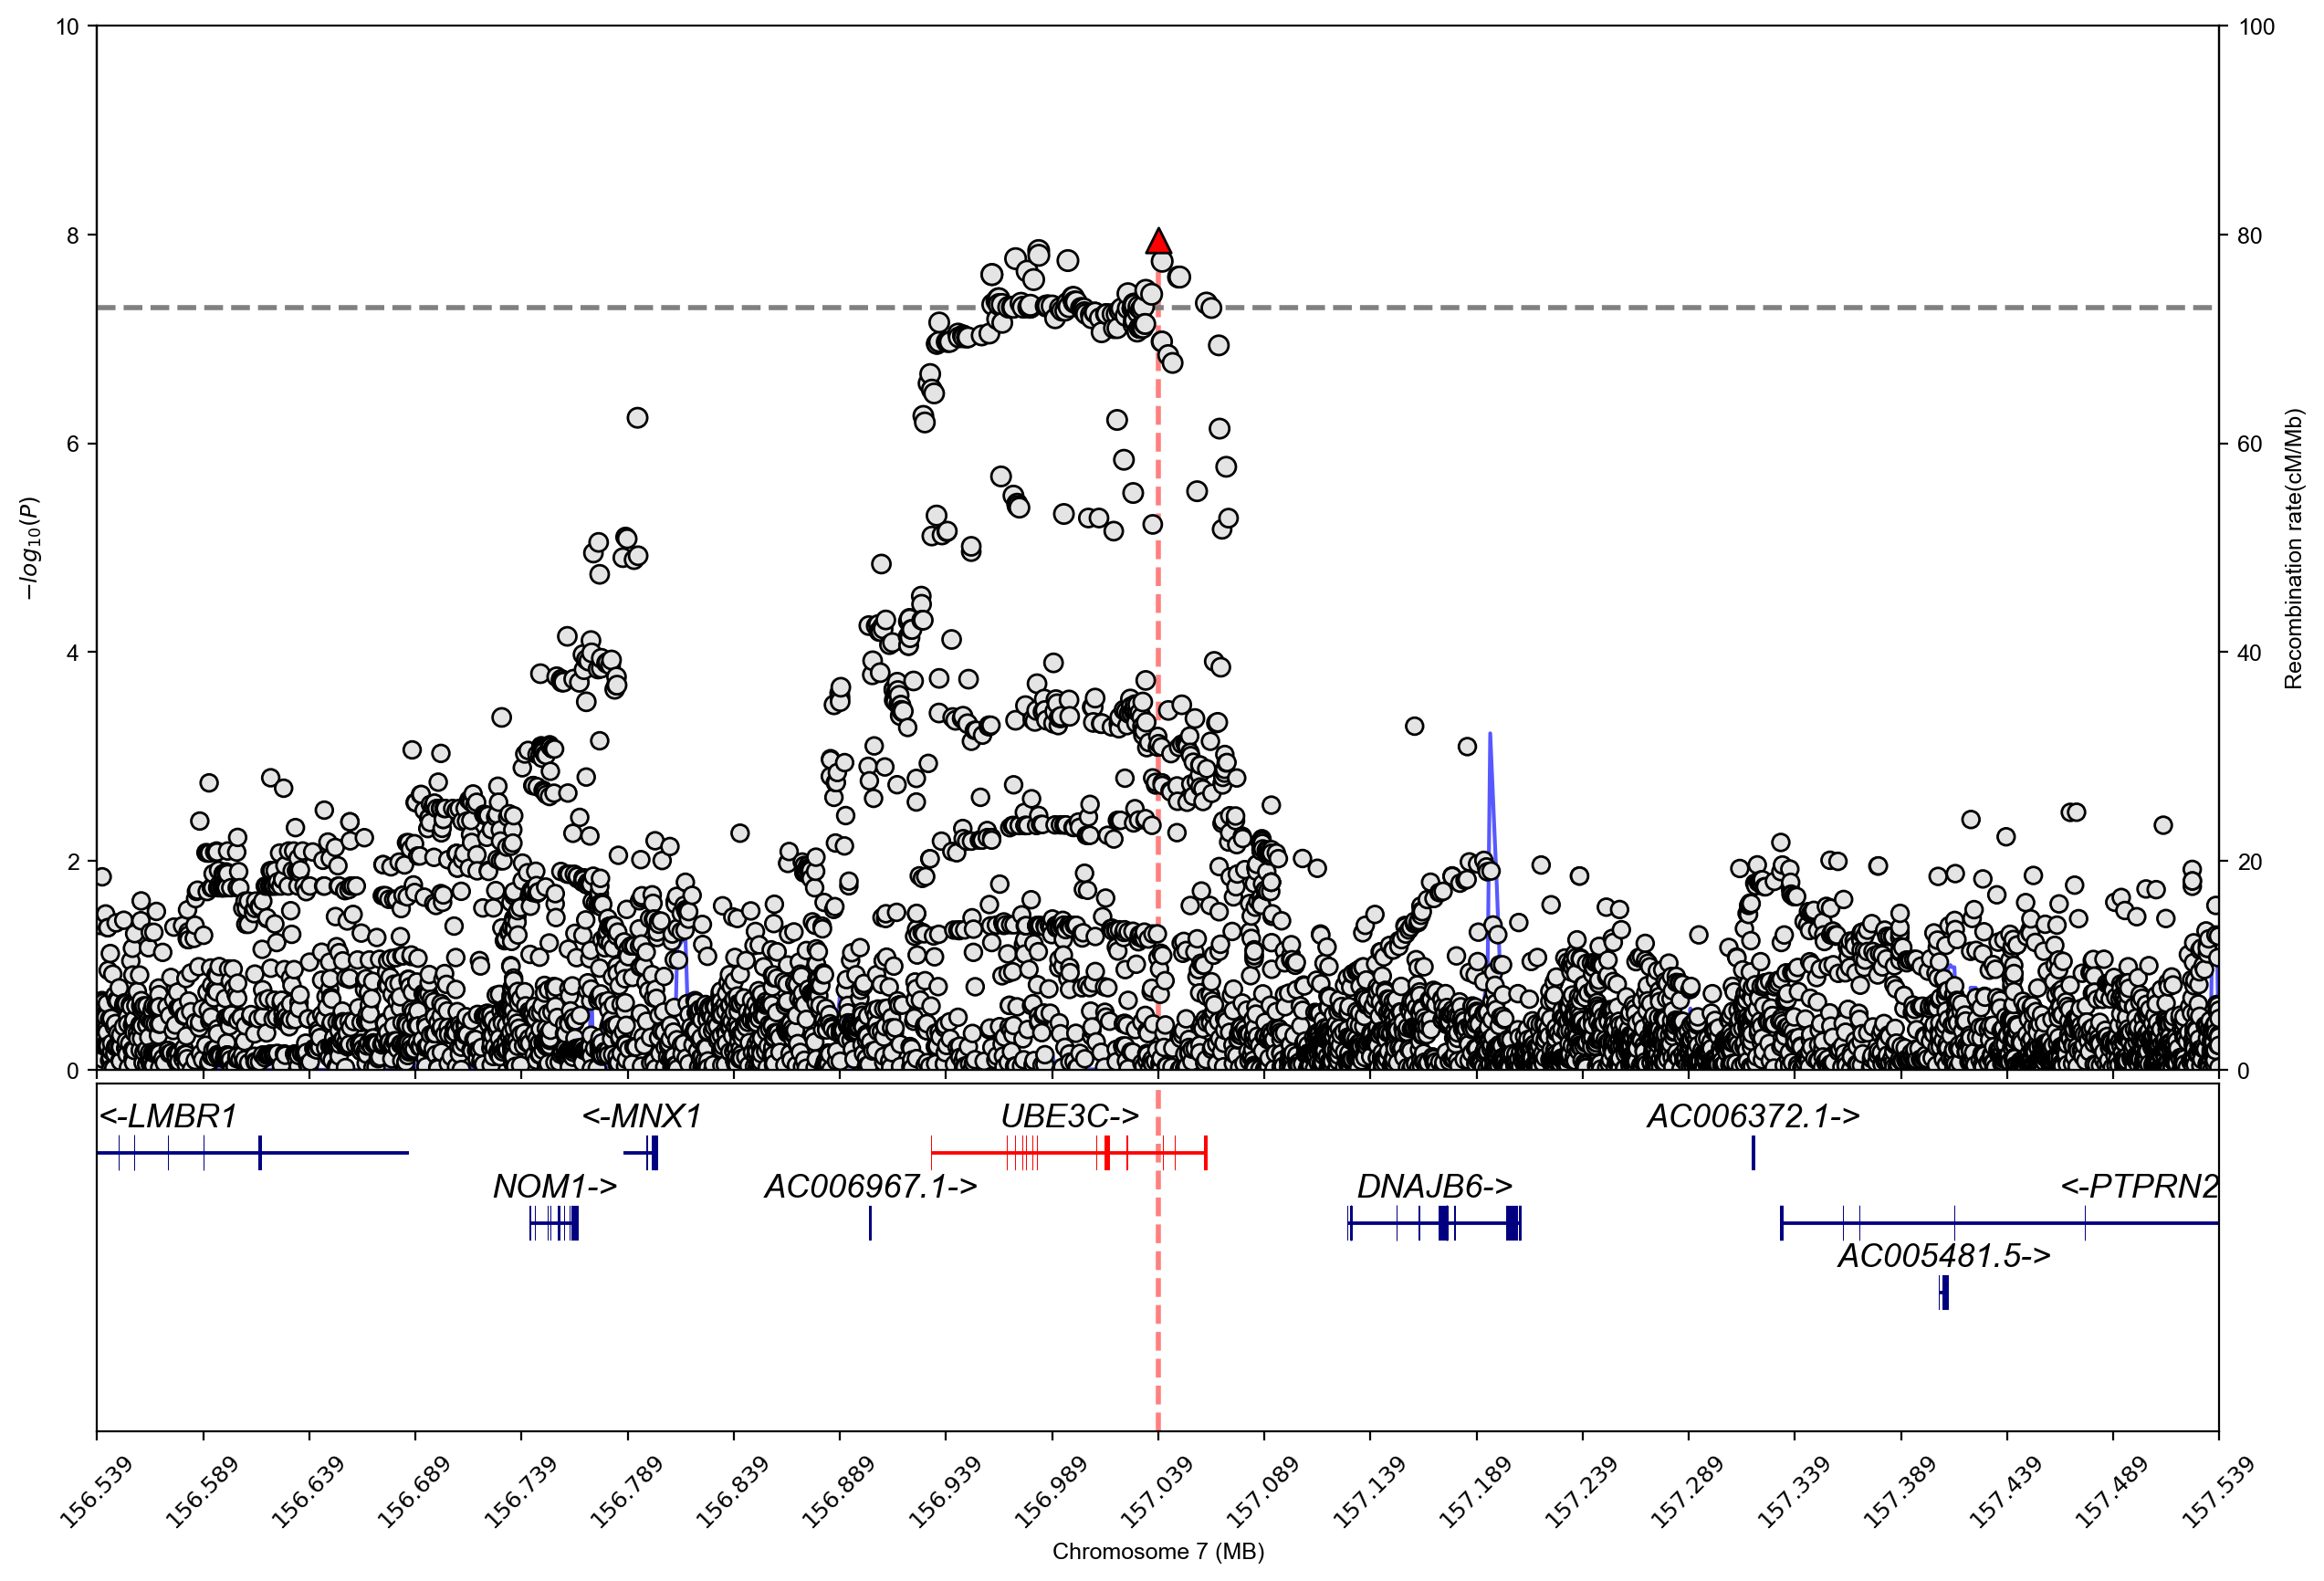

In [8]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803))

## Create regional plot with gene track and LD information

2025/03/06 16:04:39 Start to create MQQ plot...v3.5.6:
2025/03/06 16:04:39  -Genomic coordinates version: 19...
2025/03/06 16:04:39  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:04:39  -Raw input contains 707780 variants...
2025/03/06 16:04:39  -MQQ plot layout mode is : r
2025/03/06 16:04:39  -Region to plot : chr7:156538803-157538803.
2025/03/06 16:04:39  -Checking chromosome notations in VCF/BCF files...
2025/03/06 16:04:39  -Checking prefix for chromosomes in VCF/BCF files...
2025/03/06 16:04:40  -No prefix for chromosomes in the VCF/BCF files.
2025/03/06 16:04:40  -Extract SNPs in region : chr7:156538803-157538803...
2025/03/06 16:04:40  -Extract SNPs in specified regions: 5831
2025/03/06 16:04:40 Finished loading specified columns from the sumstats.
2025/03/06 16:04:40 Start data conversion and sanity check:
2025/03/06 16:04:40  -Removed 0 variants with nan in CHR or POS column ...
2025/03/06 16:04:40  -Removed 0 variants with CHR <=0...
2025/03/06 16

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/03/06 16:05:13  -plotting gene track..
2025/03/06 16:05:13  -plotting genes: 9..
2025/03/06 16:05:13  -plotting exons: 391..
2025/03/06 16:05:13  -Finished plotting gene track..
2025/03/06 16:05:13 Finished creating MQQ plot successfully!
2025/03/06 16:05:13 Start to extract variants for annotation...
2025/03/06 16:05:14  -Found 1 significant variants with a sliding window size of 500 kb...
2025/03/06 16:05:14 Finished extracting variants for annotation...
2025/03/06 16:05:14 Start to process figure arts.
2025/03/06 16:05:14  -Processing X labels...
2025/03/06 16:05:14  -Processing Y labels...
2025/03/06 16:05:14  -Processing Y tick lables...
2025/03/06 16:05:14  -Processing Y labels...
2025/03/06 16:05:14  -Processing color bar...
2025/03/06 16:05:14  -Processing lines...
2025/03/06 16:05:14 Finished processing figure arts.
2025/03/06 16:05:14 Start to annotate variants...
2025/03/06 16:05:14  -Skip annotating
2025/03/06 16:05:14 Finished annotating variants.
2025/03/06 16:05:14 

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7fab83047350>)

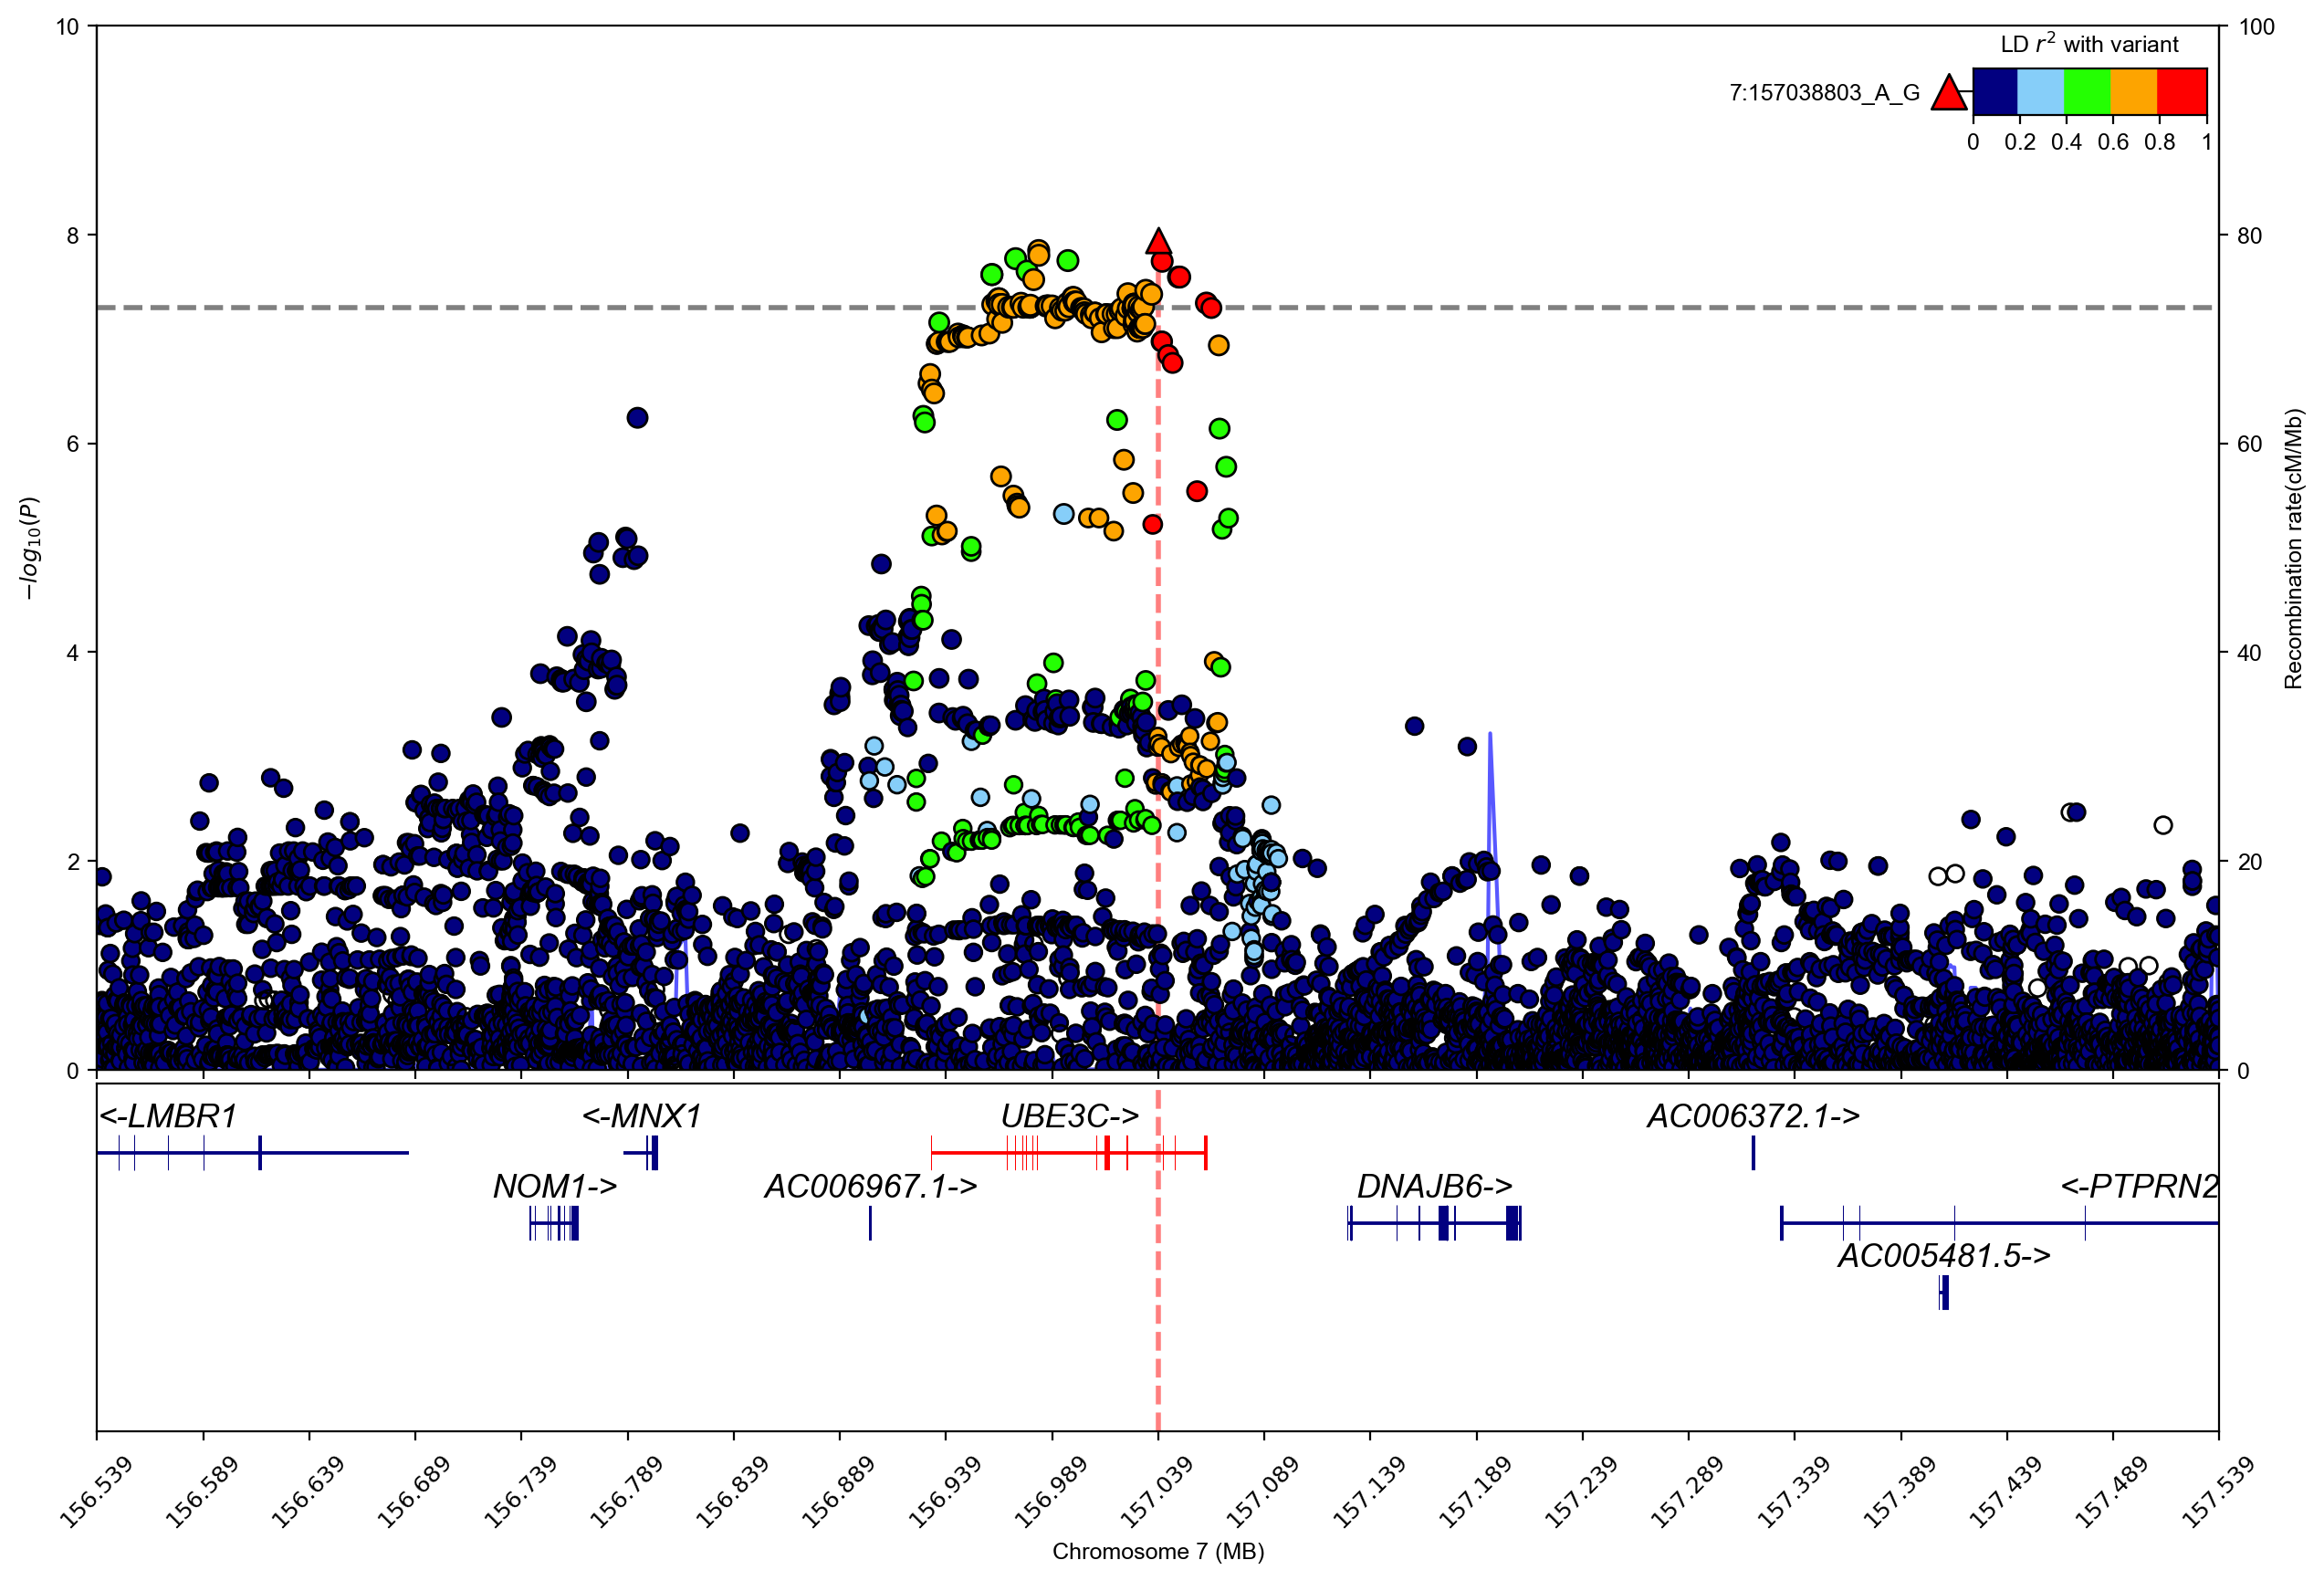

In [9]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803),                    
                    vcf_path=gl.get_path("1kg_eas_hg19")
                   )

## Create regional plot with two reference variants

In [10]:
mysumstats.filter_flanking_by_chrpos([(7,156738803)],windowsizekb=100).get_lead(sig_level=1e-5)

2025/03/06 16:05:15 Start to extract variants in the flanking regions using CHR and POS...
2025/03/06 16:05:15  - Central positions: [(7, 156738803)]
2025/03/06 16:05:15  - Flanking windowsize in kb: 100
2025/03/06 16:05:15  - Variants in flanking region 7:156638803-156838803 : 1119
2025/03/06 16:05:15  - Extracted 1119 variants in the regions.
2025/03/06 16:05:15 Finished extracting variants in the flanking regions.
2025/03/06 16:05:15 Start to extract lead variants...v3.5.6
2025/03/06 16:05:15  -Current Dataframe shape : 1119 x 12 ; Memory usage: 22.16 MB
2025/03/06 16:05:15  -Processing 1119 variants...
2025/03/06 16:05:15  -Significance threshold : 1e-05
2025/03/06 16:05:15  -Sliding window size: 500  kb
2025/03/06 16:05:15  -Using P for extracting lead variants...
2025/03/06 16:05:15  -Found 4 significant variants in total...
2025/03/06 16:05:15  -Identified 1 lead variants!
2025/03/06 16:05:15 Finished extracting lead variants.


SNPID  CHR        POS  EA NEA     EAF    BETA      SE  \
694190  7:156793450_G_GA    7  156793450  GA   G  0.1168  0.0838  0.0167   

                   P       N DIRECTION   STATUS  
694190  5.686000e-07  191764      ++++  1960399

2025/03/06 16:05:15 Start to create MQQ plot...v3.5.6:
2025/03/06 16:05:15  -Genomic coordinates version: 19...
2025/03/06 16:05:15  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:05:15  -Raw input contains 707780 variants...
2025/03/06 16:05:15  -MQQ plot layout mode is : r
2025/03/06 16:05:15  -Region to plot : chr7:156538803-157538803.
2025/03/06 16:05:15  -Checking chromosome notations in VCF/BCF files...
2025/03/06 16:05:15  -Checking prefix for chromosomes in VCF/BCF files...
2025/03/06 16:05:15  -No prefix for chromosomes in the VCF/BCF files.
2025/03/06 16:05:15  -Extract SNPs in region : chr7:156538803-157538803...
2025/03/06 16:05:15  -Extract SNPs in specified regions: 5831
2025/03/06 16:05:15 Finished loading specified columns from the sumstats.
2025/03/06 16:05:15 Start data conversion and sanity check:
2025/03/06 16:05:15  -Removed 0 variants with nan in CHR or POS column ...
2025/03/06 16:05:15  -Removed 0 variants with CHR <=0...
2025/03/06 16

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/03/06 16:05:49  -plotting gene track..
2025/03/06 16:05:49  -plotting genes: 9..
2025/03/06 16:05:49  -plotting exons: 391..
2025/03/06 16:05:49  -Finished plotting gene track..
2025/03/06 16:05:49 Finished creating MQQ plot successfully!
2025/03/06 16:05:49 Start to extract variants for annotation...
2025/03/06 16:05:49  -Found 2 specified variants to annotate...
2025/03/06 16:05:49 Finished extracting variants for annotation...
2025/03/06 16:05:49 Start to process figure arts.
2025/03/06 16:05:49  -Processing X labels...
2025/03/06 16:05:49  -Processing Y labels...
2025/03/06 16:05:49  -Processing Y tick lables...
2025/03/06 16:05:49  -Processing Y labels...
2025/03/06 16:05:49  -Processing color bar...
2025/03/06 16:05:49  -Processing lines...
2025/03/06 16:05:49 Finished processing figure arts.
2025/03/06 16:05:49 Start to annotate variants...
2025/03/06 16:05:49  -Annotating using column CHR:POS...
2025/03/06 16:05:49  -Adjusting text positions with repel_force=0.03...
2025/0

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7fab83047350>)

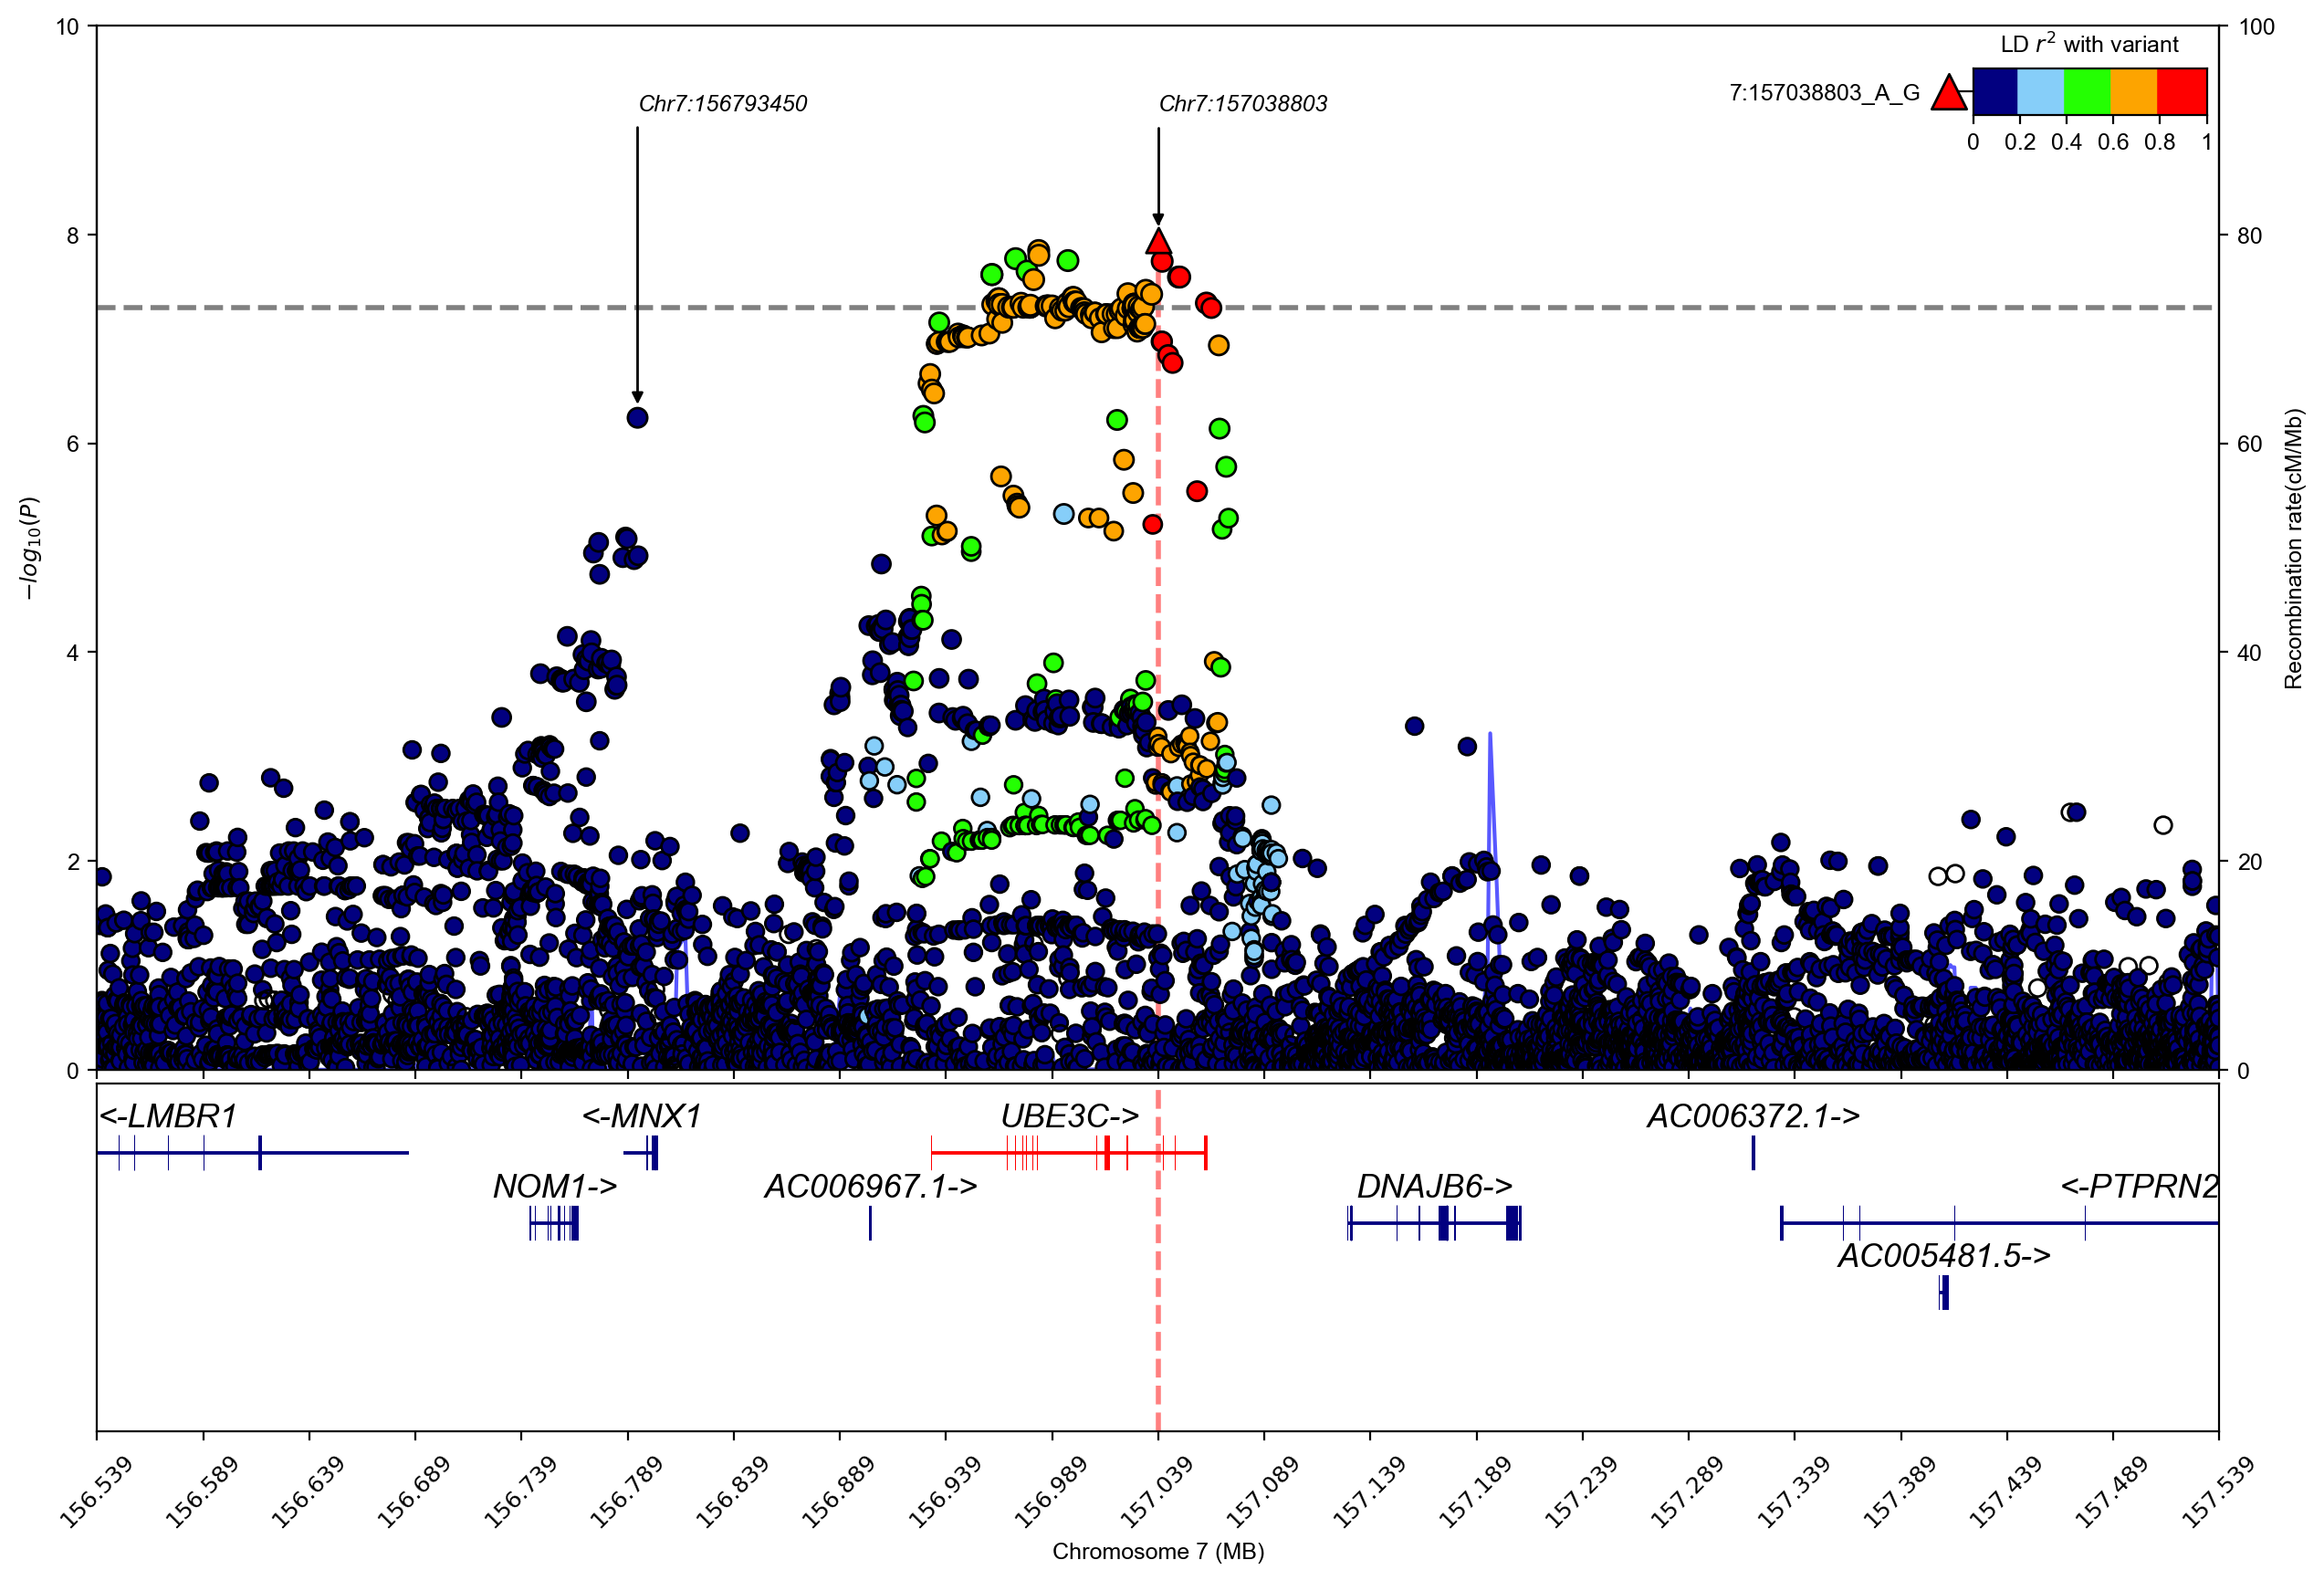

In [11]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803),      
                    region_ref2 = "7:156793450_G_GA", 
                    vcf_path=gl.get_path("1kg_eas_hg19"),
                    anno=True,
                    anno_set=["7:156793450_G_GA","7:157038803_A_G"],
                    anno_args={"rotation":0}
                   )

## Create stacked regional plot

2025/03/06 16:05:50 Start to create stacked mqq plot by iteratively calling plot_mqq:
2025/03/06 16:05:50  -Panel mode:['m', 'm']...
2025/03/06 16:05:50 Start to create MQQ plot...v3.5.6:
2025/03/06 16:05:50  -Genomic coordinates version: 19...
2025/03/06 16:05:50  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:05:50  -Raw input contains 707780 variants...
2025/03/06 16:05:50  -MQQ plot layout mode is : r
2025/03/06 16:05:50  -Region to plot : chr7:156538803-157538803.
2025/03/06 16:05:50  -Checking chromosome notations in VCF/BCF files...
2025/03/06 16:05:50  -Checking prefix for chromosomes in VCF/BCF files...
2025/03/06 16:05:50  -No prefix for chromosomes in the VCF/BCF files.
2025/03/06 16:05:51  -Extract SNPs in region : chr7:156538803-157538803...
2025/03/06 16:05:51  -Extract SNPs in specified regions: 5831
2025/03/06 16:05:51 Finished loading specified columns from the sumstats.
2025/03/06 16:05:51 Start data conversion and sanity check:
2025/03/06 1

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/03/06 16:06:25  -plotting gene track..
2025/03/06 16:06:25  -plotting genes: 9..
2025/03/06 16:06:25  -plotting exons: 391..
2025/03/06 16:06:25  -Finished plotting gene track..
2025/03/06 16:06:26 Finished creating MQQ plot successfully!
2025/03/06 16:06:26 Start to extract variants for annotation...
2025/03/06 16:06:26  -Found 2 specified variants to annotate...
2025/03/06 16:06:26 Finished extracting variants for annotation...
2025/03/06 16:06:26 Start to process figure arts.
2025/03/06 16:06:26  -Processing X labels...
2025/03/06 16:06:26  -Processing Y labels...
2025/03/06 16:06:26  -Processing Y tick lables...
2025/03/06 16:06:26  -Processing Y labels...
2025/03/06 16:06:26  -Processing color bar...
2025/03/06 16:06:26  -Processing lines...
2025/03/06 16:06:26 Finished processing figure arts.
2025/03/06 16:06:26 Start to annotate variants...
2025/03/06 16:06:26  -Annotating using column CHR:POS...
2025/03/06 16:06:26  -Adjusting text positions with repel_force=0.03...
2025/0

(<Figure size 3200x2400 with 6 Axes>, <gwaslab.g_Log.Log at 0x7fab82a23290>)

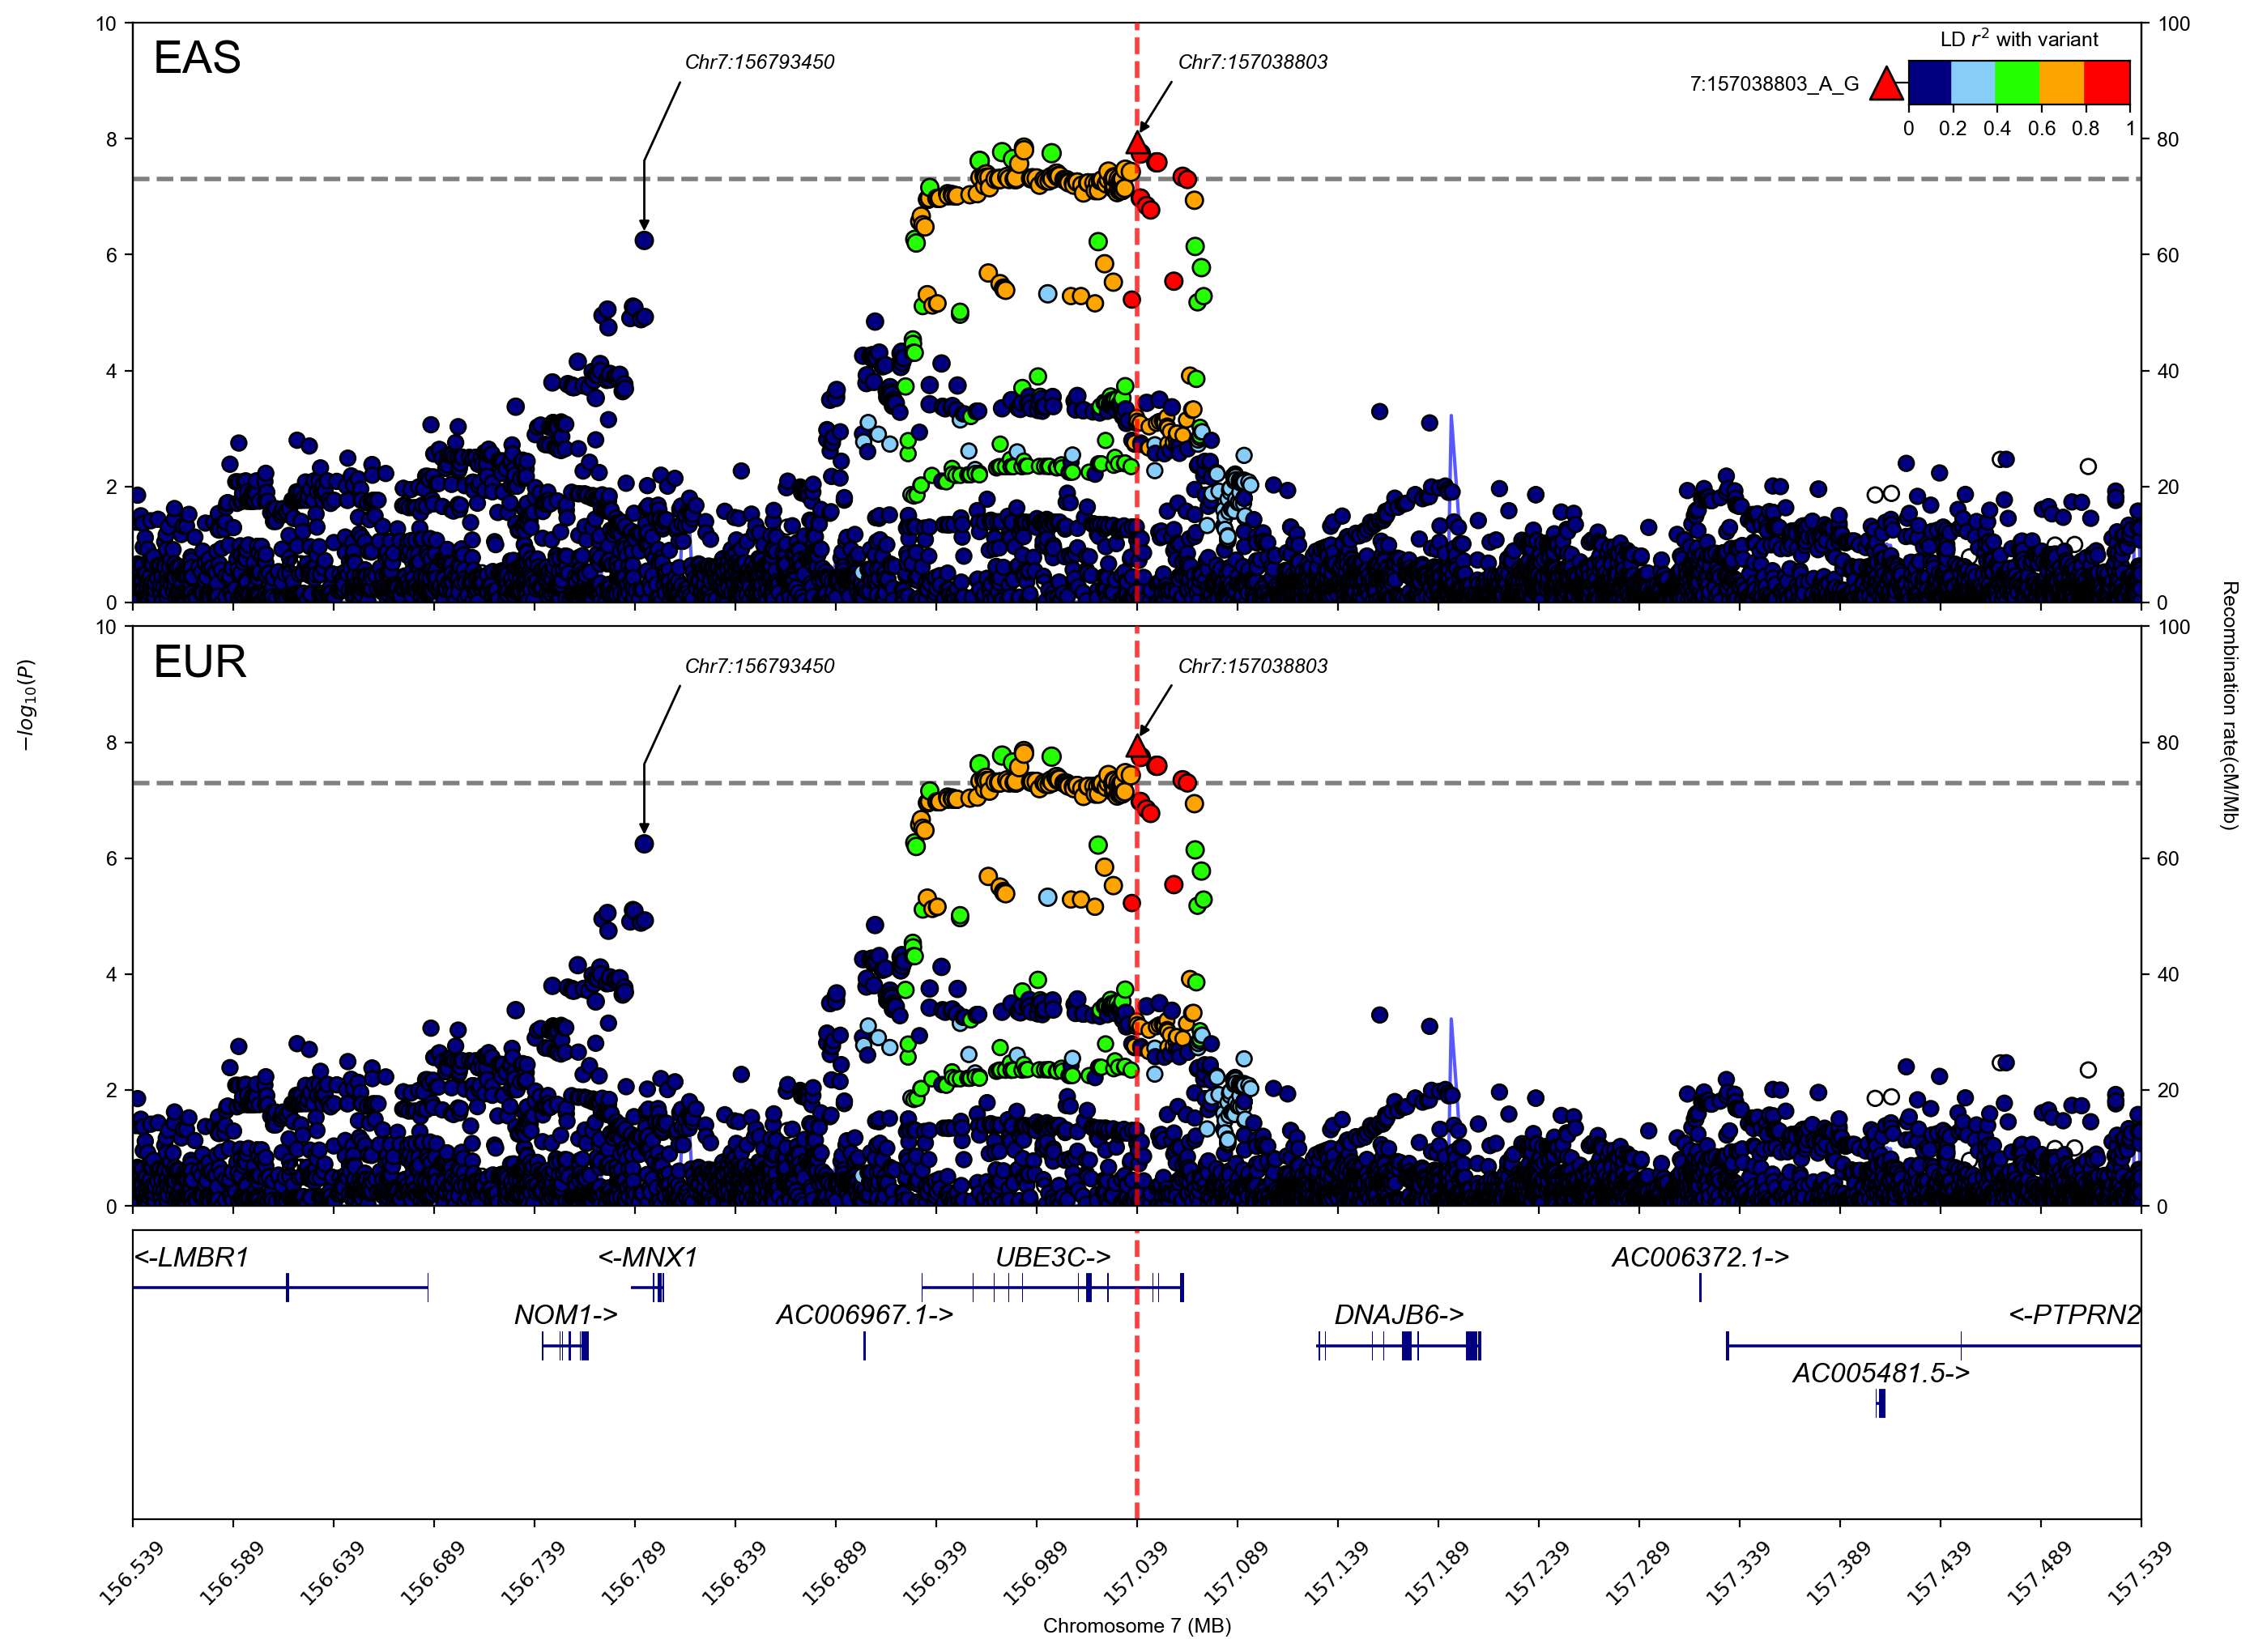

In [12]:
gl.plot_stacked_mqq(objects=[mysumstats,mysumstats],
                    vcfs=[gl.get_path("1kg_eas_hg19"),gl.get_path("1kg_eas_hg19")],
                    region=(7,156538803,157538803), 
                    mode="r",
                    build="19",
                    anno=True,
                    anno_style="right",anno_xshift=0.02,
                    anno_set=["7:156793450_G_GA","7:157038803_A_G"],
                    titles=["EAS","EUR"],
                    title_args={"size":20},
                    anno_args={"rotation":0})

## Create regional plots with user-provided GTF files

Gene track can be customized using user-provided GTF files. 

- `gtf_path`: your GTF path
- `gtf_chr_dict`: a dictionary converting chr numbers in sumstats to chr strings in GTF
- `gtf_gene_name`: GTF field that will be used as names for genes

Here is an example using dog GTF (it is just an example and doesn't make any sense here)

2025/03/06 16:06:30 Start to create MQQ plot...v3.5.6:
2025/03/06 16:06:30  -Genomic coordinates version: 19...
2025/03/06 16:06:30  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:06:30  -Raw input contains 707780 variants...
2025/03/06 16:06:30  -MQQ plot layout mode is : r
2025/03/06 16:06:30  -Region to plot : chr7:4534653-4734655.
2025/03/06 16:06:30  -Checking chromosome notations in VCF/BCF files...
2025/03/06 16:06:31  -Checking prefix for chromosomes in VCF/BCF files...
2025/03/06 16:06:31  -No prefix for chromosomes in the VCF/BCF files.
2025/03/06 16:06:31  -Extract SNPs in region : chr7:4534653-4734655...
2025/03/06 16:06:31  -Extract SNPs in specified regions: 1007
2025/03/06 16:06:31 Finished loading specified columns from the sumstats.
2025/03/06 16:06:31 Start data conversion and sanity check:
2025/03/06 16:06:31  -Removed 0 variants with nan in CHR or POS column ...
2025/03/06 16:06:31  -Removed 0 variants with CHR <=0...
2025/03/06 16:06:31  

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'gene_source', 'gene_biotype', 'transcript_id', 'transcript_version', 'transcript_source', 'transcript_biotype', 'tag', 'exon_number', 'exon_id', 'exon_version', 'protein_id', 'protein_version', 'gene_name', 'transcript_name', 'projection_parent_transcript']


2025/03/06 16:06:48  -plotting gene track..
2025/03/06 16:06:48  -plotting genes: 4..
2025/03/06 16:06:48  -plotting exons: 26..
2025/03/06 16:06:48  -Finished plotting gene track..
2025/03/06 16:06:48 Finished creating MQQ plot successfully!
2025/03/06 16:06:48 Start to extract variants for annotation...
2025/03/06 16:06:48 Finished extracting variants for annotation...
2025/03/06 16:06:48 Start to process figure arts.
2025/03/06 16:06:48  -Processing X labels...
2025/03/06 16:06:48  -Processing Y labels...
2025/03/06 16:06:48  -Processing Y tick lables...
2025/03/06 16:06:48  -Processing Y labels...
2025/03/06 16:06:48  -Processing color bar...
2025/03/06 16:06:48  -Processing lines...
2025/03/06 16:06:48 Finished processing figure arts.
2025/03/06 16:06:48 Start to annotate variants...
2025/03/06 16:06:48  -Skip annotating
2025/03/06 16:06:48 Finished annotating variants.
2025/03/06 16:06:48 Start to save figure...
2025/03/06 16:06:48  -Skip saving figure!
2025/03/06 16:06:48 Finish

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.g_Log.Log at 0x7fab83047350>)

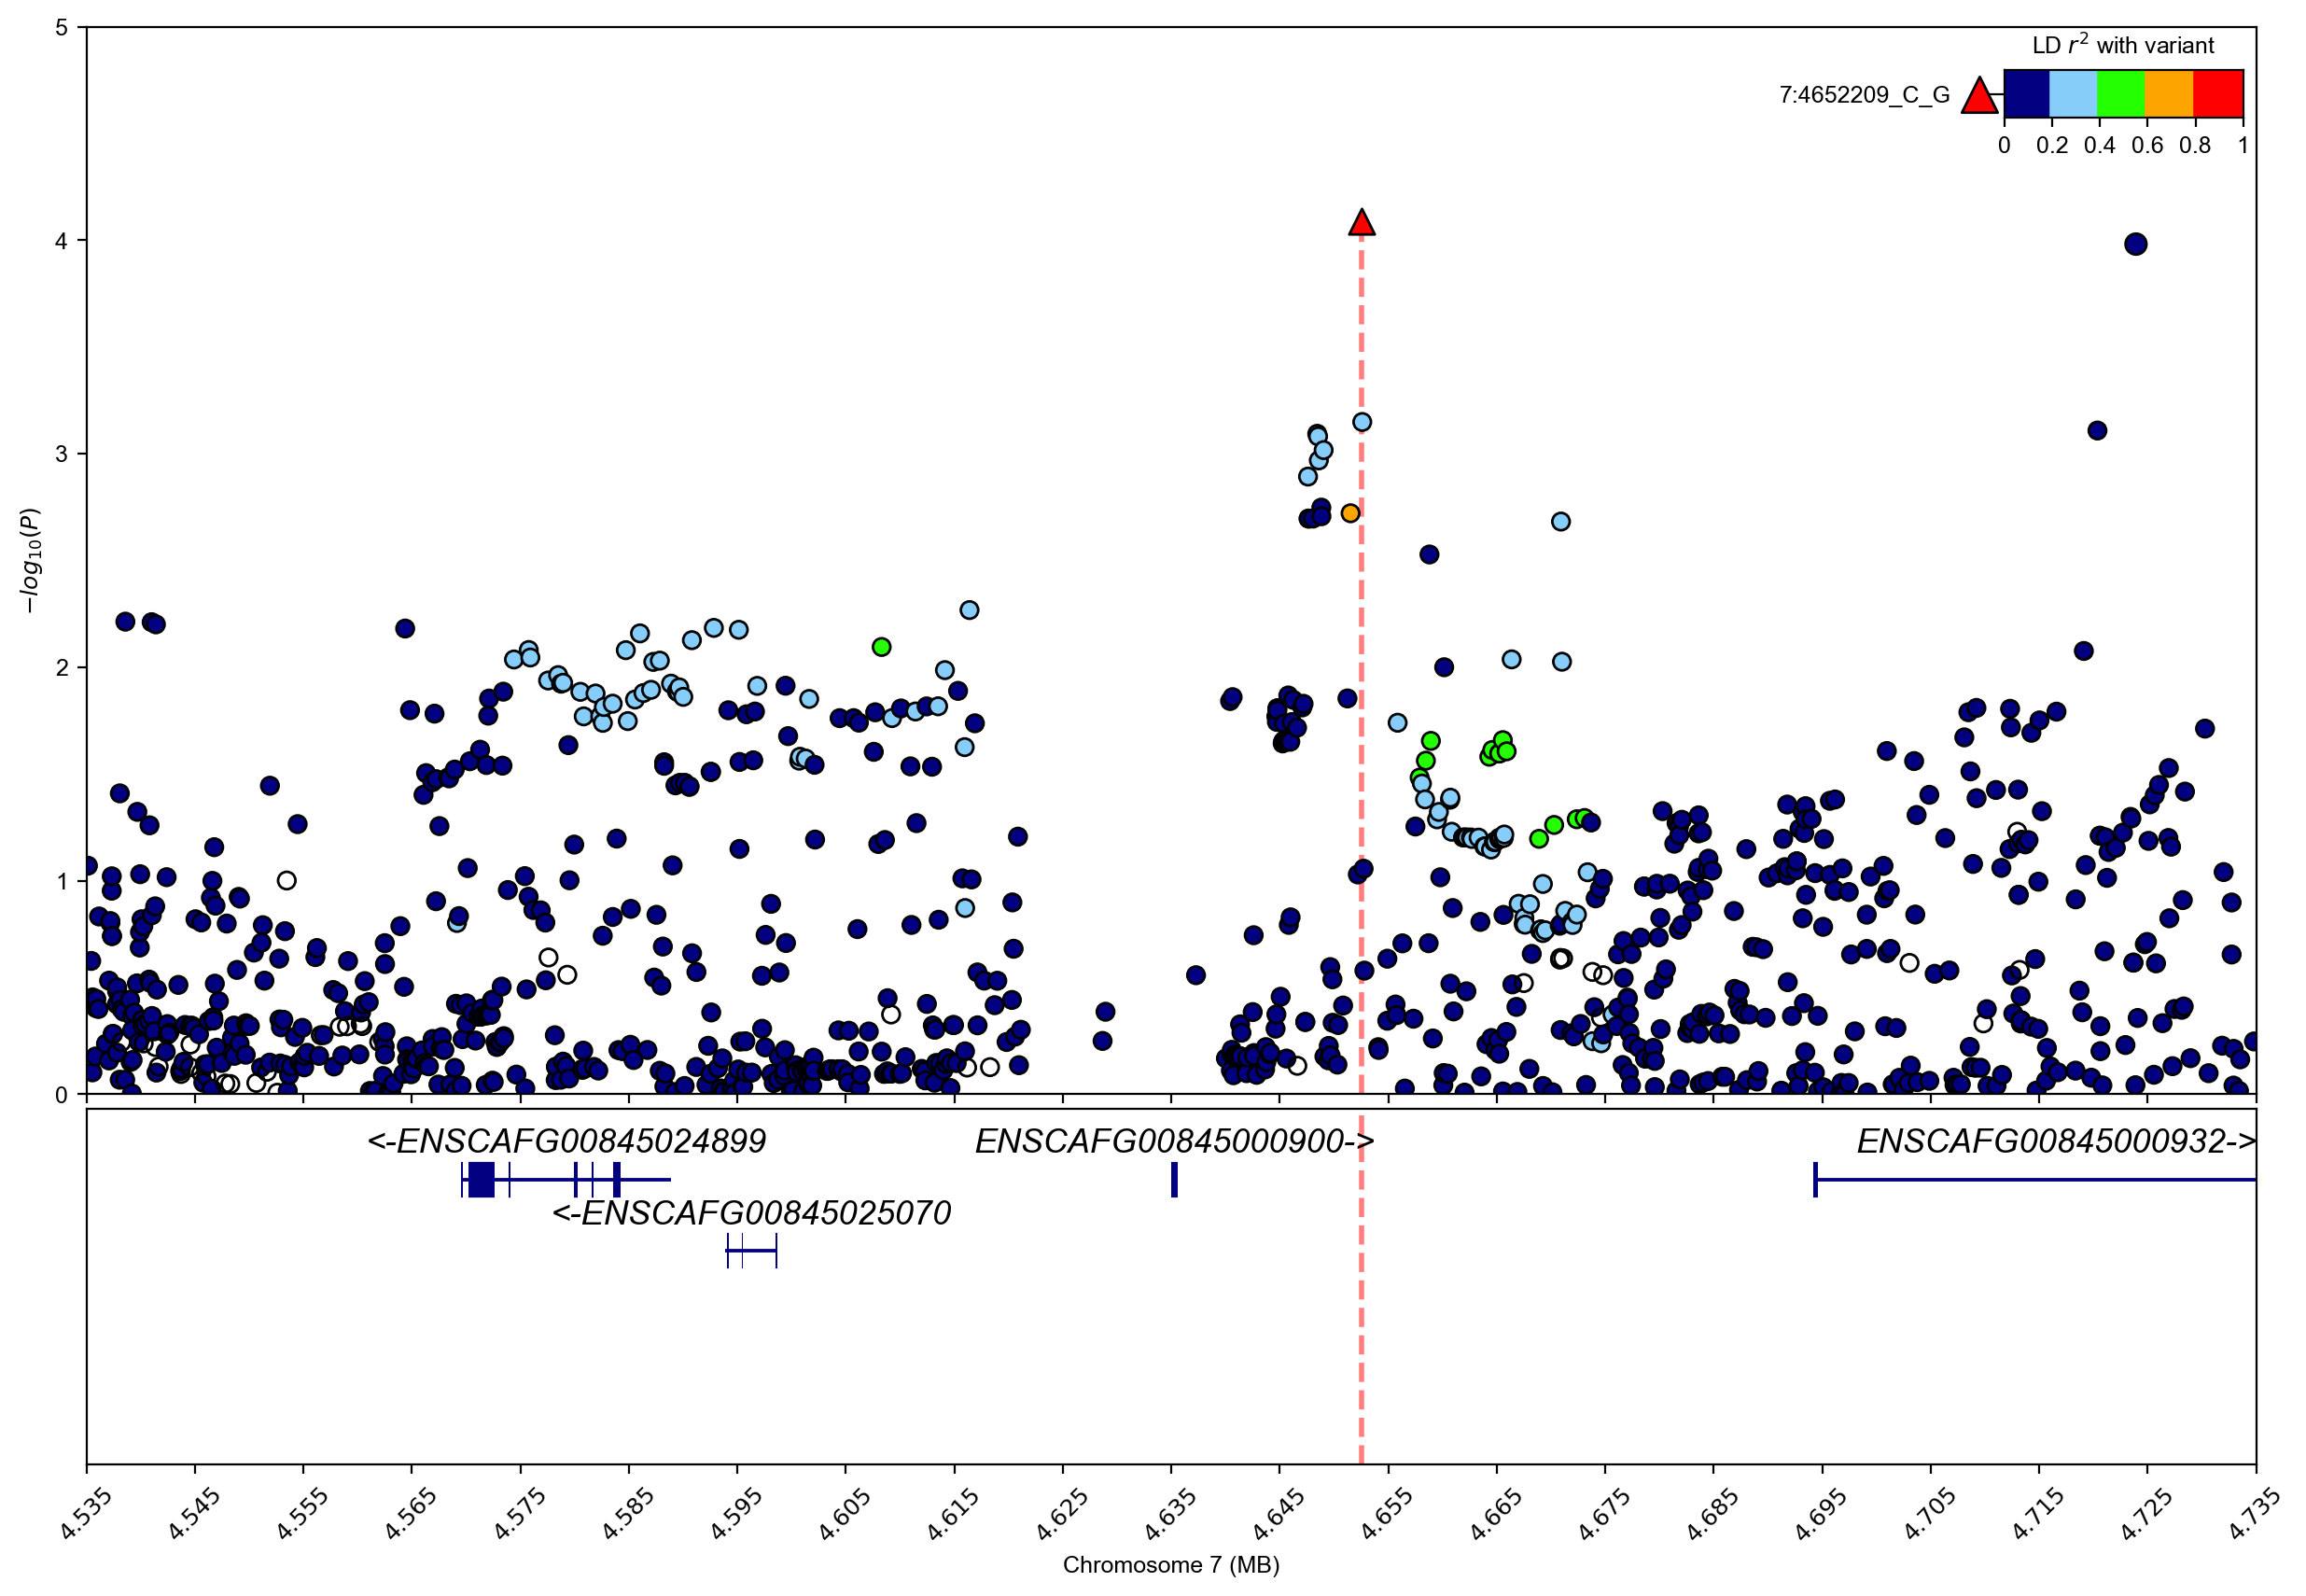

In [13]:
mysumstats.plot_mqq(mode="r",
                    region=(7, 4534653 ,4734655), 
                    vcf_path=gl.get_path("1kg_eas_hg19"),
                    gtf_path="/home/yunye/.gwaslab/Canis_lupus_familiaris.ROS_Cfam_1.0.113.gtf.gz",
                    gtf_chr_dict = gl.get_number_to_chr(),
                    gtf_gene_name="gene_id",
                    region_recombination=False
                   )

## Create regional plots with user-provided recombination rate files

Use `rr_path` to specify recombination rate file in the following format:

In [14]:
#genetic_map_GRCh37_chr7.txt.gz
#Chromosome      Position(bp)    Rate(cM/Mb)     Map(cM)
#chr7    35326   0.251801        0.000000
#chr7    35411   0.482009        0.000021
#chr7    40483   0.598191        0.002466

2025/03/06 16:06:49 Start to create MQQ plot...v3.5.6:
2025/03/06 16:06:49  -Genomic coordinates version: 19...
2025/03/06 16:06:49  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/06 16:06:49  -Raw input contains 707780 variants...
2025/03/06 16:06:49  -MQQ plot layout mode is : r
2025/03/06 16:06:49  -Region to plot : chr7:156538803-157538803.
2025/03/06 16:06:49  -Checking chromosome notations in VCF/BCF files...
2025/03/06 16:06:49  -Checking prefix for chromosomes in VCF/BCF files...
2025/03/06 16:06:49  -No prefix for chromosomes in the VCF/BCF files.
2025/03/06 16:06:49  -Extract SNPs in region : chr7:156538803-157538803...
2025/03/06 16:06:49  -Extract SNPs in specified regions: 5831
2025/03/06 16:06:49 Finished loading specified columns from the sumstats.
2025/03/06 16:06:49 Start data conversion and sanity check:
2025/03/06 16:06:49  -Removed 0 variants with nan in CHR or POS column ...
2025/03/06 16:06:49  -Removed 0 variants with CHR <=0...
2025/03/06 16

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/03/06 16:07:23  -plotting gene track..
2025/03/06 16:07:23  -plotting genes: 9..
2025/03/06 16:07:23  -plotting exons: 391..
2025/03/06 16:07:23  -Finished plotting gene track..
2025/03/06 16:07:23 Finished creating MQQ plot successfully!
2025/03/06 16:07:23 Start to extract variants for annotation...
2025/03/06 16:07:24  -Found 1 significant variants with a sliding window size of 500 kb...
2025/03/06 16:07:24 Finished extracting variants for annotation...
2025/03/06 16:07:24 Start to process figure arts.
2025/03/06 16:07:24  -Processing X labels...
2025/03/06 16:07:24  -Processing Y labels...
2025/03/06 16:07:24  -Processing Y tick lables...
2025/03/06 16:07:24  -Processing Y labels...
2025/03/06 16:07:24  -Processing color bar...
2025/03/06 16:07:24  -Processing lines...
2025/03/06 16:07:24 Finished processing figure arts.
2025/03/06 16:07:24 Start to annotate variants...
2025/03/06 16:07:24  -Skip annotating
2025/03/06 16:07:24 Finished annotating variants.
2025/03/06 16:07:24 

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7fab83047350>)

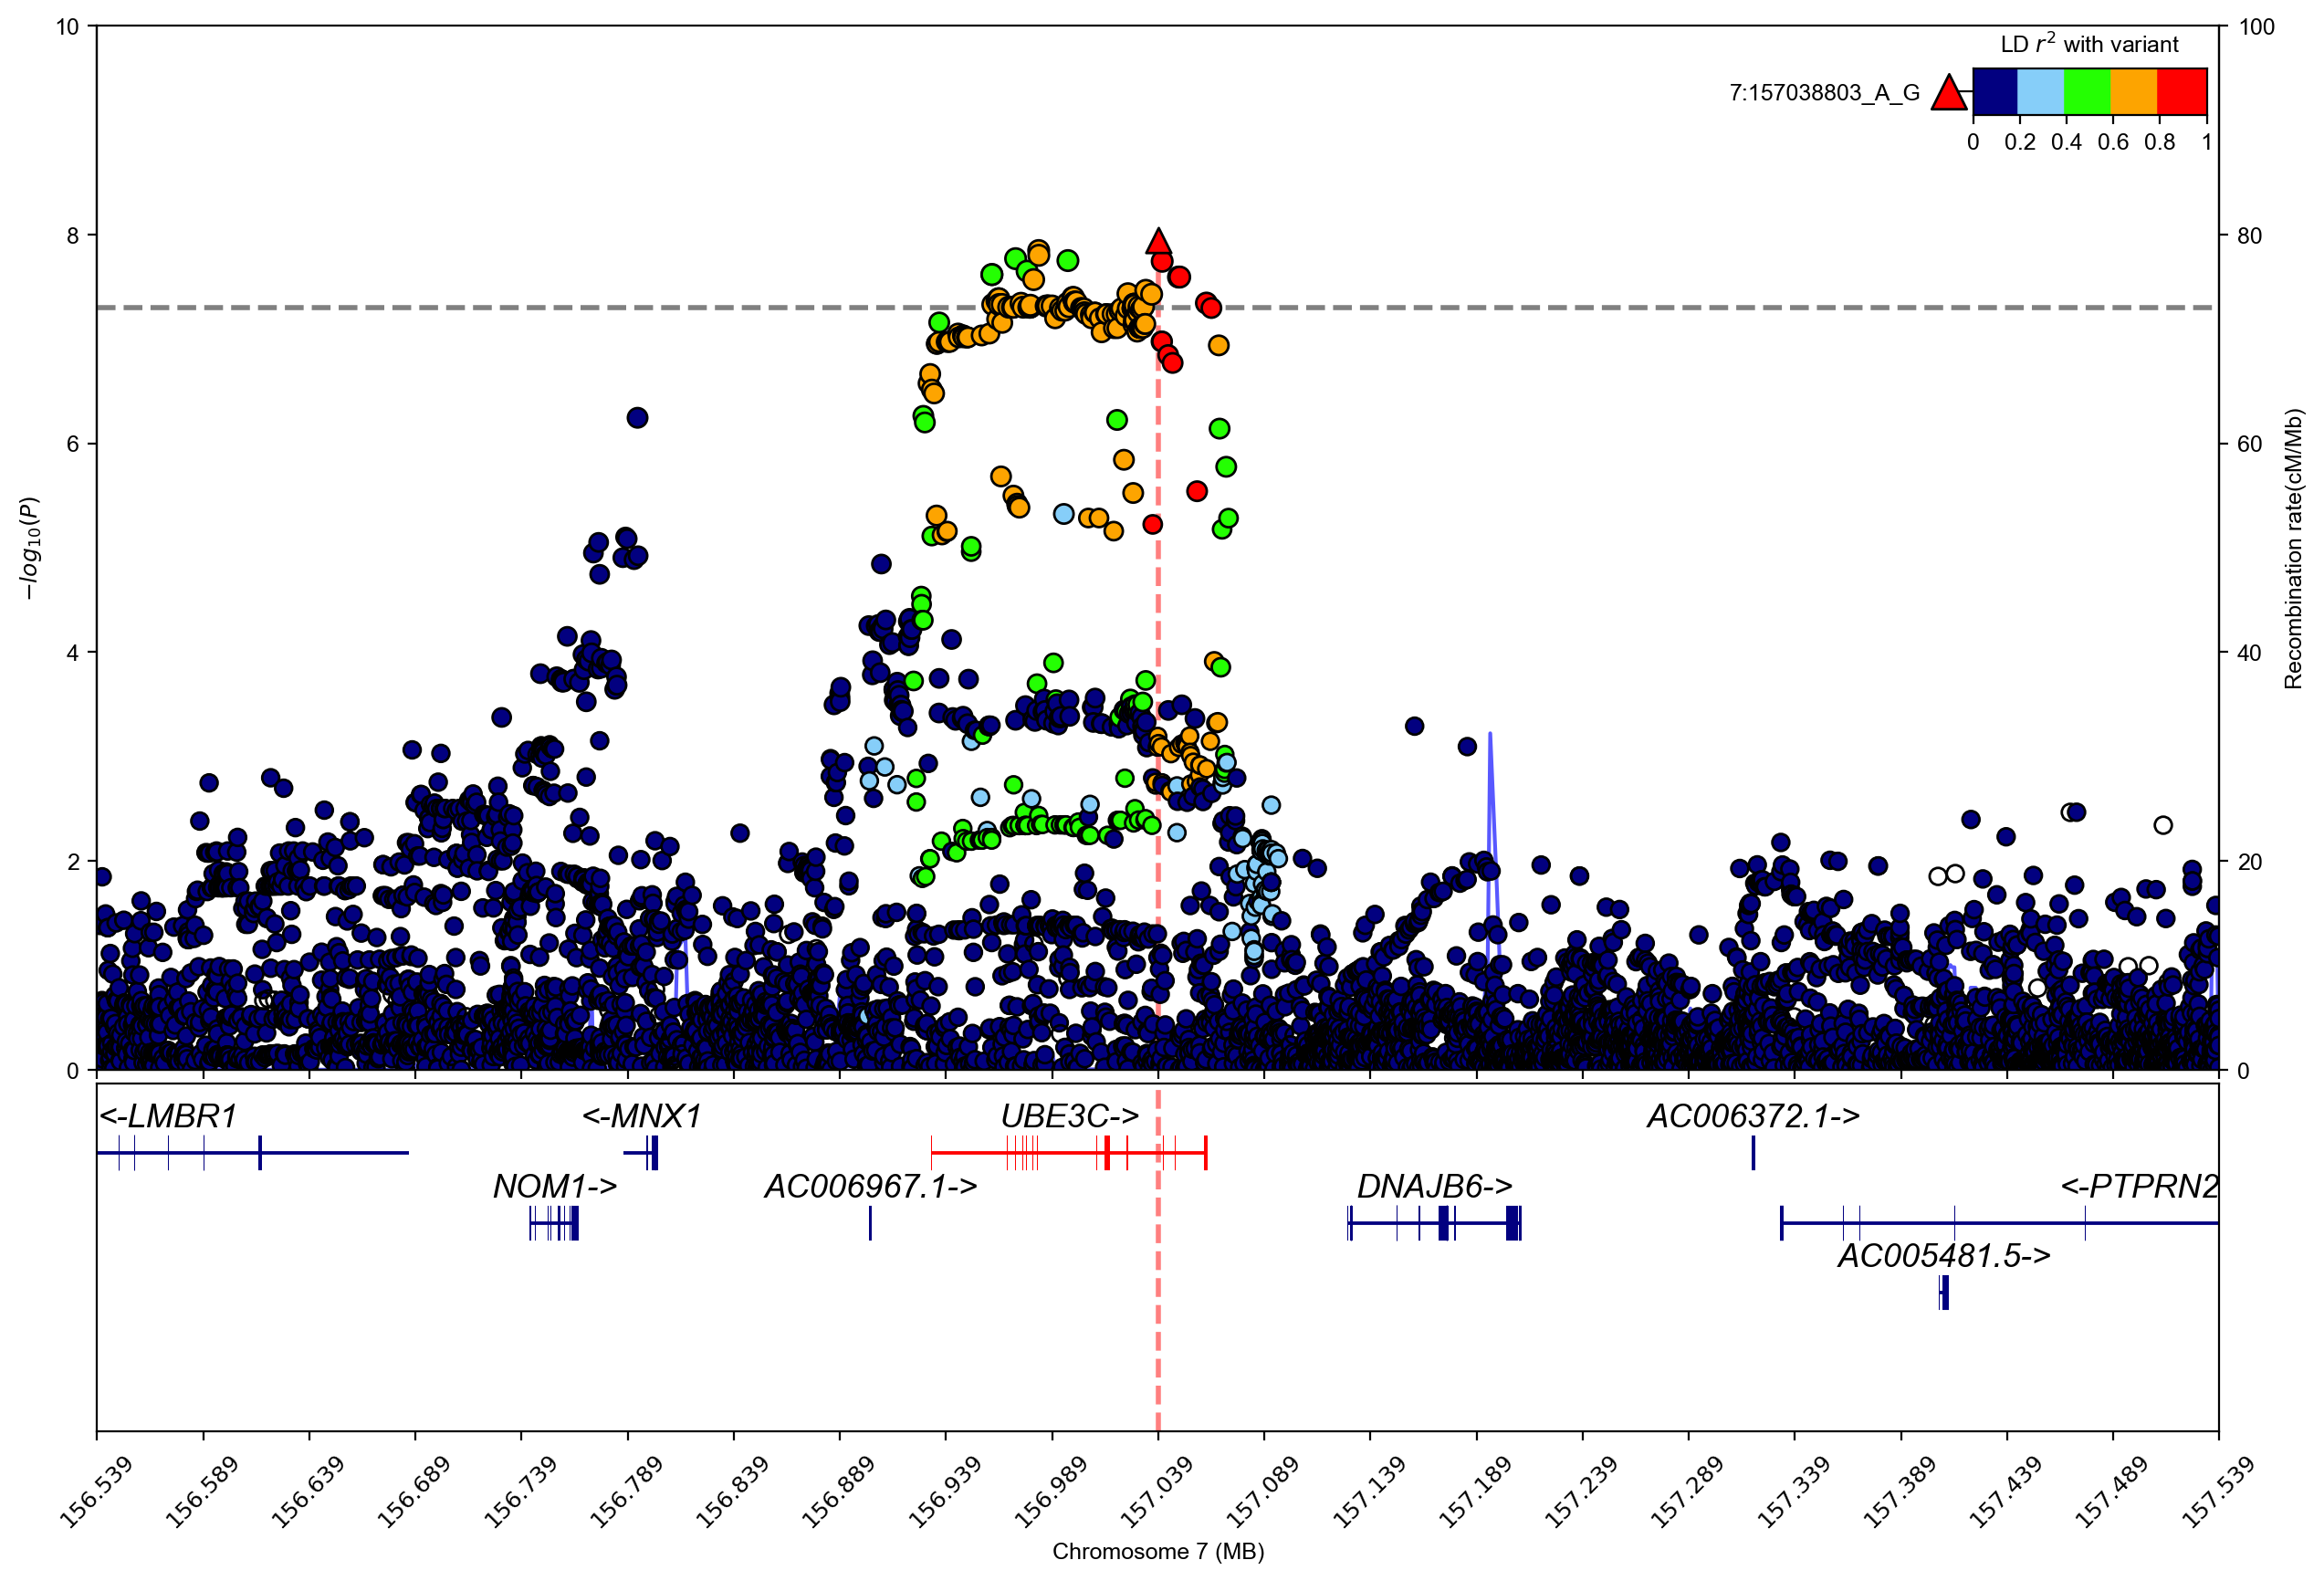

In [15]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803), 
                    vcf_path=gl.get_path("1kg_eas_hg19"),
                    rr_path="/home/yunye/.gwaslab/genetic_map_GRCh37_chr7.txt.gz"
                   )